In [1]:
import cv2
import numpy as np

font = cv2.FONT_HERSHEY_SIMPLEX

In [2]:
#查看图片
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
def show_images(images,closize=2,set_locator=False,titles=[]):
    
    rows=int(len(images)/closize)+1
    fig=plt.figure(figsize=(20,15))
    
    xmajorLocator = MultipleLocator(50)  # 将x主刻度标签设置为50的倍数
    xminorLocator = MultipleLocator(5) #将x轴次刻度标签设置为5的倍数
    
    ymajorLocator = MultipleLocator(50)
    yminorLocator = MultipleLocator(5) #将x轴次刻度标签设置为5的倍数
    
    for find,image in enumerate(images):
        if not np.any(image>1):
            image=image*255
        ax=fig.add_subplot(rows,closize,find+1)
        ax.imshow(image)
        
        if len(titles)==0:
            plt.title('{}-({})'.format(find,image.shape)) #图片大小作为标题
        else:
            plt.title('{}-({})'.format(titles[find],image.shape)) #自定义标题
        
        if set_locator:
            #主刻度
            ax.xaxis.set_major_locator(xmajorLocator)
            ax.yaxis.set_major_locator(ymajorLocator)
            
            #次刻度
            ax.xaxis.set_minor_locator(xminorLocator)
            ax.yaxis.set_minor_locator(yminorLocator)
            
            ax.xaxis.grid(True, which='major',linestyle='-.') #x坐标轴的网格使用主刻度
            ax.yaxis.grid(True, which='major',linestyle='-.') #x坐标轴的网格使用主刻度
    plt.show()

# 生成测试数据

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


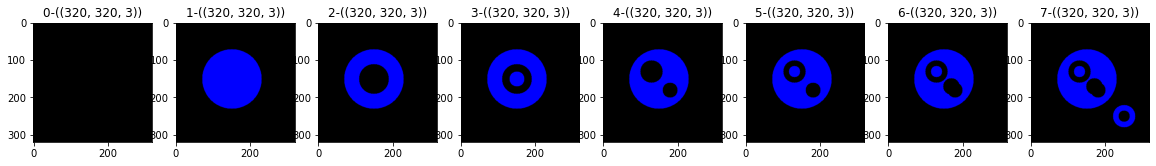

In [8]:
#生成测试图片
image_width=320
image_height=320
image_binary=np.zeros((image_width,image_height,3))

circle_image_binary1=image_binary.copy()
cv2.circle(circle_image_binary1, (150, 150), 80,(0,0,255), -1)

circle_image_binary2=circle_image_binary1.copy()
cv2.circle(circle_image_binary2, (150, 150), 40,(0,0,0), -1)

circle_image_binary3=circle_image_binary2.copy()
cv2.circle(circle_image_binary3, (150, 150), 20,(0,0,255), -1)

circle_image_binary4=circle_image_binary1.copy()
cv2.circle(circle_image_binary4, (130, 130), 30,(0,0,0), -1)
cv2.circle(circle_image_binary4, (180, 180), 20,(0,0,0), -1)

circle_image_binary5=circle_image_binary1.copy()
cv2.circle(circle_image_binary5, (130, 130), 30,(0,0,0), -1)
cv2.circle(circle_image_binary5, (130, 130), 15,(0,0,255), -1)
cv2.circle(circle_image_binary5, (180, 180), 20,(0,0,0), -1)

circle_image_binary6=circle_image_binary1.copy()
cv2.circle(circle_image_binary6, (130, 130), 30,(0,0,0), -1)
cv2.circle(circle_image_binary6, (130, 130), 15,(0,0,255), -1)
cv2.circle(circle_image_binary6, (180, 180), 20,(0,0,0), -1)
cv2.circle(circle_image_binary6, (170, 170), 22,(0,0,0), -1)

circle_image_binary7=circle_image_binary1.copy()
cv2.circle(circle_image_binary7, (130, 130), 30,(0,0,0), -1)
cv2.circle(circle_image_binary7, (130, 130), 15,(0,0,255), -1)
cv2.circle(circle_image_binary7, (180, 180), 20,(0,0,0), -1)
cv2.circle(circle_image_binary7, (170, 170), 22,(0,0,0), -1)
cv2.circle(circle_image_binary7, (250, 250), 30,(0,0,255), -1)
cv2.circle(circle_image_binary7, (250, 250), 15,(0,0,0), -1)

show_images([image_binary,circle_image_binary1,circle_image_binary2,circle_image_binary3,circle_image_binary4,circle_image_binary5,circle_image_binary6,circle_image_binary7],closize=8)

# 获取边缘点集

## 获取边缘点集并画出来

In [3]:
def drawContours(circle_image_binary,contours,maxdis=1):
    color_values=list(range(220,80,-20))
    for i in range(len(contours)):
        new_contour=cv2.approxPolyDP(contours[i],1,True) #使用opencv求得近似多边形的点集合
        print('contours.shape/new_contour.shape',np.array(contours[i]).shape,np.array(new_contour).shape)
        
        #中心点
        M = cv2.moments(contours[i]) # 计算第一条轮廓的各阶矩,字典形式
        center_x = int(M["m10"] / M["m00"])
        center_y = int(M["m01"] / M["m00"])
        
        points=list(map(lambda point:tuple(point),np.array(new_contour).squeeze()))
        for ind,point in enumerate(points):
            point_image_binary=cv2.circle(circle_image_binary, point, 1,(255,0,0), 2)
            
            text_pointX,text_pointY=point[0],point[1]
            if(point[0]<center_x and point[1]<center_y):
                text_pointX,text_pointY= point[0]-5,point[1]-5 
            if(point[0]>center_x and point[1]<center_y):
                text_pointX,text_pointY= point[0],point[1]-5 
            if(point[0]<center_x and point[1]>center_y):
                text_pointX,text_pointY= point[0]-10,point[1]+10 
            if(point[0]>center_x and point[1]>center_y):
                text_pointX,text_pointY= point[0]+10,point[1]+10 
            cv2.putText(point_image_binary,str(ind),(text_pointX,text_pointY),cv2.FONT_HERSHEY_SIMPLEX,0.3,(0,255,0),1)
    show_images([circle_image_binary,circle_image_binary])

## 无空洞情况

In [ ]:
circle_image_binary=circle_image_binary1.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

## 一个空洞

In [ ]:
# cv2.RETR_EXTERNAL     表示只检测外轮廓
# cv2.RETR_LIST         检测的轮廓不建立等级关系
# cv2.RETR_CCOMP        建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层。
# cv2.RETR_TREE         建立一个等级树结构的轮廓。

circle_image_binary=circle_image_binary2.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary2.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary2.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary2.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

## 2个空洞

In [ ]:
# cv2.RETR_EXTERNAL     表示只检测外轮廓
# cv2.RETR_LIST         检测的轮廓不建立等级关系
# cv2.RETR_CCOMP        建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层。
# cv2.RETR_TREE         建立一个等级树结构的轮廓。

circle_image_binary=circle_image_binary3.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary3.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary3.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary3.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

## 复杂空洞1

In [ ]:
# cv2.RETR_EXTERNAL     表示只检测外轮廓
# cv2.RETR_LIST         检测的轮廓不建立等级关系
# cv2.RETR_CCOMP        建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层。
# cv2.RETR_TREE         建立一个等级树结构的轮廓。

circle_image_binary=circle_image_binary4.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary4.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary4.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary4.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

## 复杂空洞2

In [ ]:
# cv2.RETR_EXTERNAL     表示只检测外轮廓
# cv2.RETR_LIST         检测的轮廓不建立等级关系
# cv2.RETR_CCOMP        建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层。
# cv2.RETR_TREE         建立一个等级树结构的轮廓。

circle_image_binary=circle_image_binary5.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary5.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary5.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary5.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

## 复杂空洞3

In [ ]:
circle_image_binary=circle_image_binary6.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary6.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary6.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary6.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
                                                                                                                                                                                                                                                                                                       
drawContours(circle_image_binary,contours,maxdis=1)

## 复杂空洞4

In [ ]:
circle_image_binary=circle_image_binary7.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary7.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary7.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

In [ ]:
circle_image_binary=circle_image_binary7.astype(np.uint8)
contours,hierarchy =cv2.findContours(circle_image_binary[...,-1], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
drawContours(circle_image_binary,contours,maxdis=1)

# 还原mask

In [ ]:
mask=image_binary.copy()
mask=mask.astype(np.uint8)
# drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
cv2.drawContours(mask,contours,-1,(0,255,0),hierarchy=hierarchy,thickness=-1)
show_images([image_binary,mask])

In [ ]:
for ind,contour in enumerate(contours):
    print(np.array(contour).shape)

In [ ]:
test_mask=image_binary.copy()
test_mask1=test_mask.astype(np.uint8)
# drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
cv2.drawContours(test_mask1,[contours[0]],-1,(0,255,0),thickness=-1)

test_mask2=test_mask1.astype(np.uint8)
cv2.drawContours(test_mask2,[contours[1]],-1,(0,0,0),thickness=-1)

test_mask3=test_mask2.astype(np.uint8)
cv2.drawContours(test_mask3,[contours[2]],-1,(0,255,0),thickness=-1)

test_mask4=test_mask3.astype(np.uint8)
cv2.drawContours(test_mask4,[contours[3]],-1,(0,0,0),thickness=-1)

test_mask5=test_mask4.astype(np.uint8)
cv2.drawContours(test_mask5,[contours[4]],-1,(0,0,0),thickness=-1)

test_mask6=test_mask5.astype(np.uint8)
cv2.drawContours(test_mask6,[contours[5]],-1,(0,255,0),thickness=-1)

show_images([test_mask,test_mask1,test_mask2,test_mask3,test_mask4,test_mask5,test_mask6],closize=7)

# 根据点集及层次结构解析得到mask

In [4]:
# 分析所有树的根节点
def root_nodes_ind(hierarchy):
    assert len(np.array(hierarchy).shape)==3,print('hierarchy expection')
    root_nodes=[]
    for ind in range(len(hierarchy[0])):
        if hierarchy[0][ind][-1]==-1:
            root_nodes.append(ind)

    return root_nodes

In [17]:
# 获取同级节点
def get_same_level_nodes(hierarchy,level_nodes):
    # 同一级别
    re_level_nodes=[]
    for _,level_node in enumerate(level_nodes):
        next_node=hierarchy[0][level_node][2]
        if next_node>0:
            re_level_nodes.append(next_node)
        while hierarchy[0][next_node][0]>0:
            re_level_nodes.append(hierarchy[0][next_node][0])
            next_node=hierarchy[0][next_node][0]
    
    return re_level_nodes

# 构造每一颗树
def build_all_tree(hierarchy,root_nodes):
    # 从根节点完整提取每颗树list(list)
    all_tree_nodes=[]
    for ind,root_node in enumerate(root_nodes):
        tree_nodes=[[root_node]]
        re_level_nodes=get_same_level_nodes(hierarchy,[root_node])
        if len(re_level_nodes)>0:
            tree_nodes.append(re_level_nodes)
        while len(re_level_nodes)>0:
            re_level_nodes=get_same_level_nodes(hierarchy,re_level_nodes)
            if len(re_level_nodes)>0:
                tree_nodes.append(re_level_nodes)
        all_tree_nodes.append(tree_nodes)
    
    return all_tree_nodes

In [6]:
# 对没课树进行分析，得到mask
def tree_to_mask(empty_mask,contours,all_tree_nodes,isinner=True):
    draw_mask=empty_mask.copy()
    for tind,tree_nodes in enumerate(all_tree_nodes):
        if isinner:
            fill_value=255
        else:
            fill_value=0
        for lind,level_nodes in enumerate(tree_nodes):
            for nind,nodeind in enumerate(level_nodes):
                if isinner:
#                     print(tind,lind,nind,nodeind,fill_value)
                    cv2.drawContours(draw_mask,[contours[nodeind]],-1,(fill_value,fill_value,fill_value),thickness=-1)
            fill_value= 0 if fill_value==255 else 255
    
    show_images([empty_mask,draw_mask])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-1 -1 -1 -1]]]
contours.shape/new_contour.shape (116, 1, 2) (20, 1, 2)


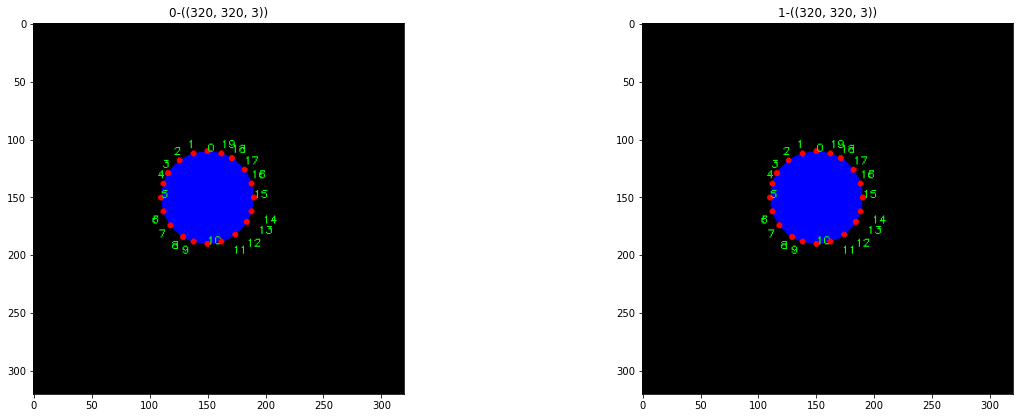

In [15]:
# 构造测试数据集
image_width=320
image_height=320
image_binary=np.zeros((image_width,image_height,3))
circle_image_binary=image_binary.copy()
# cv2.circle(circle_image_binary, (150, 150), 80,(0,0,255), -1)
# cv2.circle(circle_image_binary, (220, 110), 30,(0,0,0), -1)
# cv2.circle(circle_image_binary, (130, 130), 30,(0,0,0), -1)
# cv2.circle(circle_image_binary, (130, 130), 15,(0,0,255), -1)
# cv2.circle(circle_image_binary, (130, 130), 5,(0,0,0), -1)
# cv2.circle(circle_image_binary, (180, 180), 20,(0,0,0), -1)
# cv2.circle(circle_image_binary, (170, 170), 22,(0,0,0), -1)
# cv2.circle(circle_image_binary, (250, 250), 30,(0,0,255), -1)
# cv2.circle(circle_image_binary, (250, 250), 15,(0,0,0), -1)
# cv2.circle(circle_image_binary, (50, 250), 15,(0,0,255), -1)

cv2.circle(circle_image_binary, (150, 150), 40,(0,0,255), -1)

# 求取测试数据的边缘点集及层次结构
test_image_binary=circle_image_binary.astype(np.uint8)
contours,hierarchy =cv2.findContours(test_image_binary[...,-1], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
# print(contours)
drawContours(circle_image_binary,contours,maxdis=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0]
[[[0]]]


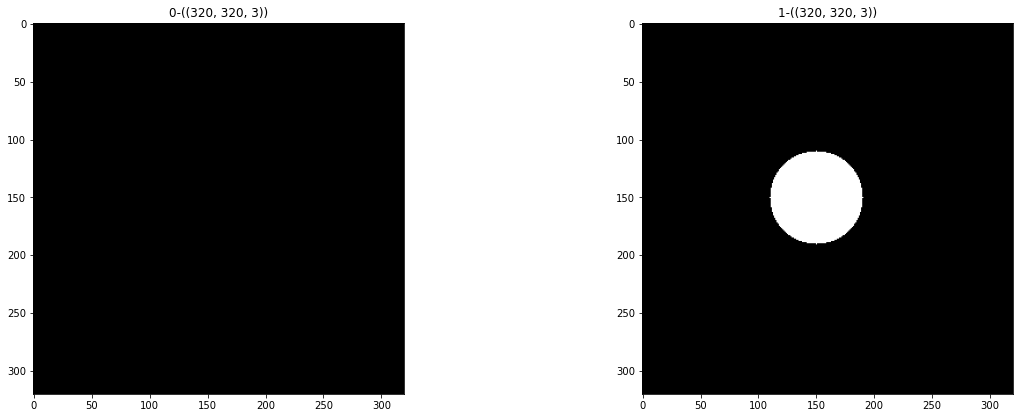

In [18]:
# 根据hierarchy及contours还原mask
root_nodes=root_nodes_ind(hierarchy)
print(root_nodes)
all_tree_nodes=build_all_tree(hierarchy,root_nodes)
print(all_tree_nodes)
tree_to_mask(image_binary,contours,all_tree_nodes,isinner=True)

# 模拟真实数据返回

## 构造多类别数据

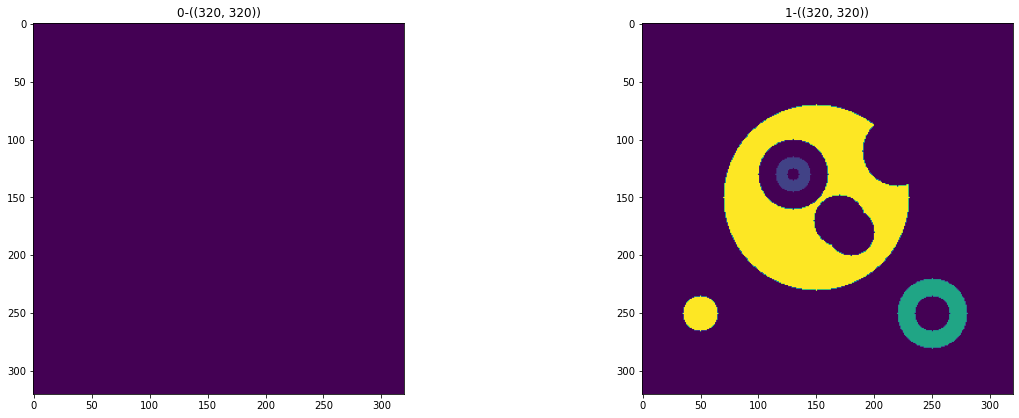

In [11]:
# 构造测试数据集
image_width=320
image_height=320
image_binary=np.zeros((image_width,image_height))
circle_image=image_binary.copy()
cv2.circle(circle_image, (150, 150), 80,255, -1)
cv2.circle(circle_image, (220, 110), 30,0, -1)
cv2.circle(circle_image, (130, 130), 30,0, -1)
cv2.circle(circle_image, (130, 130), 15,50, -1)
cv2.circle(circle_image, (130, 130), 5,0, -1)
cv2.circle(circle_image, (180, 180), 20,0, -1)
cv2.circle(circle_image, (170, 170), 22,0, -1)
cv2.circle(circle_image, (250, 250), 30,150, -1)
cv2.circle(circle_image, (250, 250), 15,0, -1)
cv2.circle(circle_image, (50, 250), 15,255, -1)

show_images([image_binary,circle_image])

[[[-1 -1  1 -1]
  [-1 -1 -1  0]]]


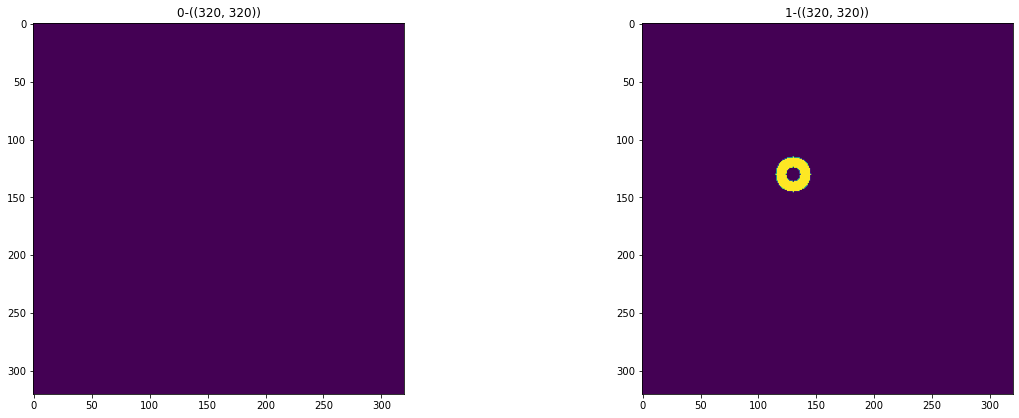

[[[-1 -1  1 -1]
  [-1 -1 -1  0]]]


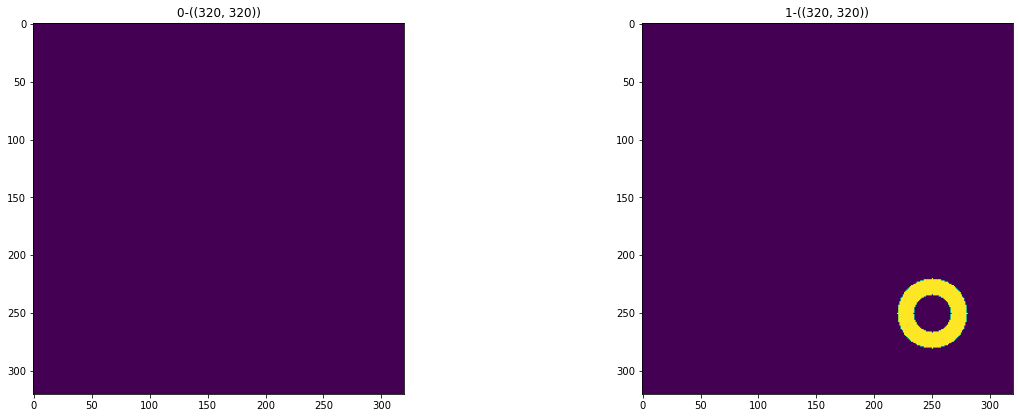

[[[ 1 -1 -1 -1]
  [-1  0  2 -1]
  [ 3 -1 -1  1]
  [-1  2 -1  1]]]


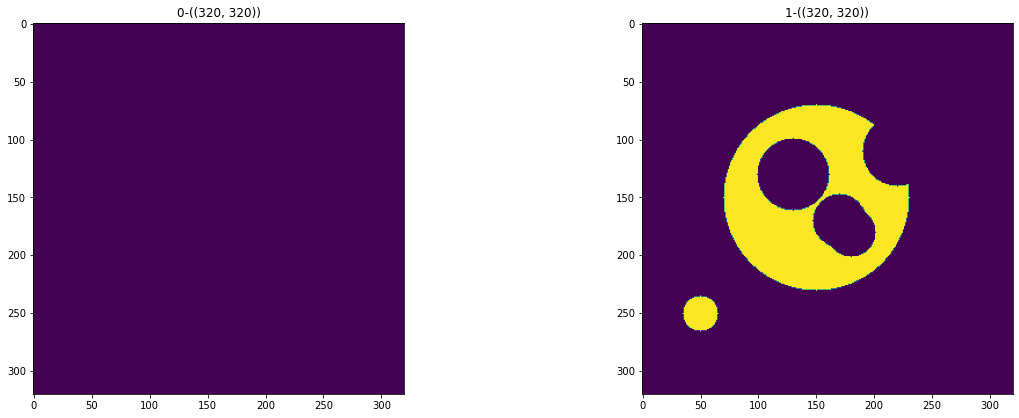

In [12]:
# 二值化
for label_value in [50,150,255]:
    test_image_binary=np.zeros_like(circle_image)
    test_image_binary=np.where(circle_image==label_value,255,test_image_binary)
    test_image_binary=test_image_binary.astype(np.uint8)
    contours,hierarchy =cv2.findContours(test_image_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(hierarchy)
    
    # 根据hierarchy及contours还原mask
    root_nodes=root_nodes_ind(hierarchy)
#     print(root_nodes)
    all_tree_nodes=build_all_tree(hierarchy,root_nodes)
#     print(all_tree_nodes)
    tree_to_mask(image_binary,contours,all_tree_nodes,isinner=True)

# 判断目标在圈内还是圈外

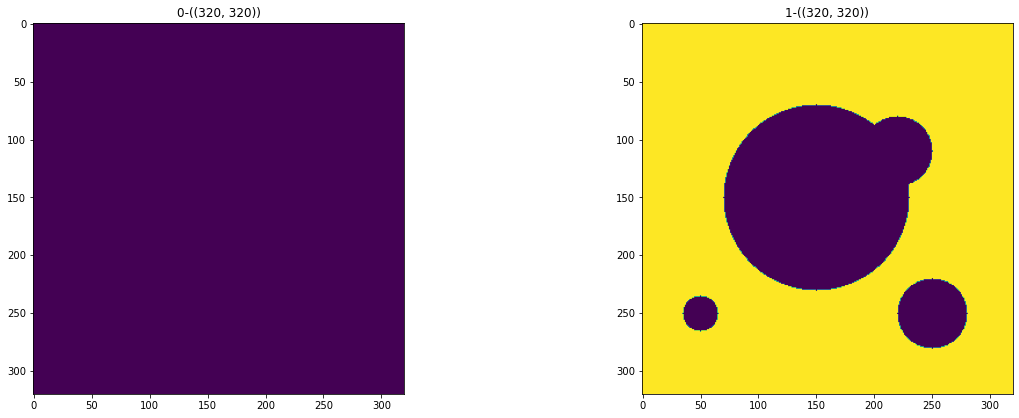

In [25]:
# 构造测试数据集
image_width=320
image_height=320
image_binary=np.ones((image_width,image_height))
circle_image=image_binary.copy()
circle_image=circle_image*100
cv2.circle(circle_image, (150, 150), 80,0, -1)
cv2.circle(circle_image, (220, 110), 30,0, -1)
cv2.circle(circle_image, (130, 130), 30,0, -1)
cv2.circle(circle_image, (130, 130), 15,0, -1)
cv2.circle(circle_image, (130, 130), 5,0, -1)
cv2.circle(circle_image, (180, 180), 20,0, -1)
cv2.circle(circle_image, (170, 170), 22,0, -1)
cv2.circle(circle_image, (250, 250), 30,0, -1)
cv2.circle(circle_image, (250, 250), 15,0, -1)
cv2.circle(circle_image, (50, 250), 15,0, -1)
show_images([image_binary,circle_image])

# circle_image=circle_image.astype(np.uint8)
# contours,hierarchy =cv2.findContours(circle_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# drawContours(circle_image,contours,maxdis=1)

[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [-1  2 -1  0]]]
contours.shape/new_contour.shape (4, 1, 2) (4, 1, 2)
contours.shape/new_contour.shape (52, 1, 2) (12, 1, 2)
contours.shape/new_contour.shape (84, 1, 2) (16, 1, 2)
contours.shape/new_contour.shape (263, 1, 2) (39, 1, 2)


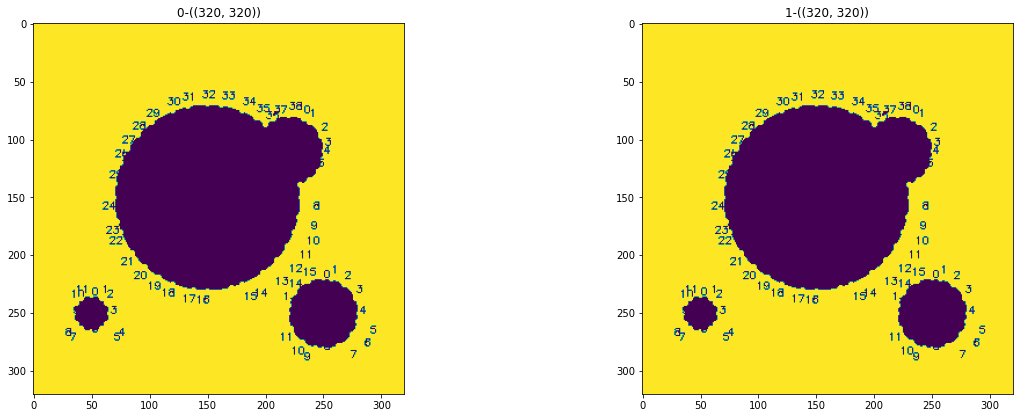

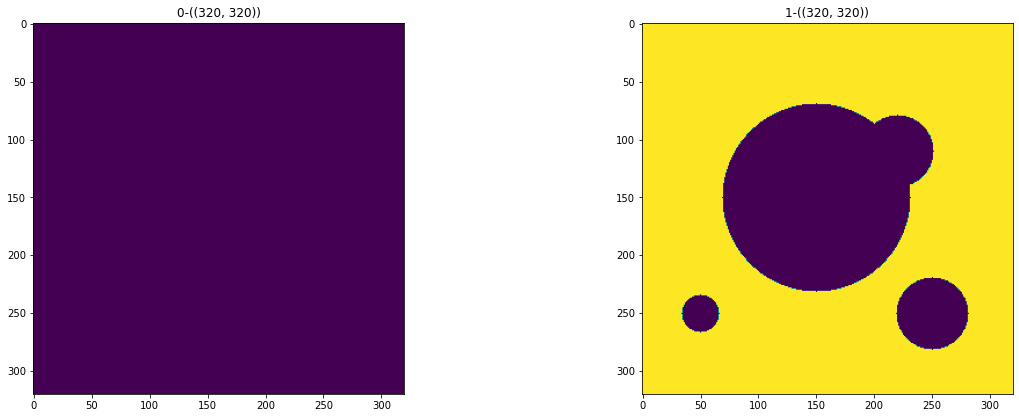

In [29]:
# 二值化
for label_value in [100]:
    test_image_binary=np.zeros_like(circle_image)
    test_image_binary=np.where(circle_image==label_value,255,test_image_binary)
    test_image_binary=test_image_binary.astype(np.uint8)
    contours,hierarchy =cv2.findContours(test_image_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(hierarchy)
    drawContours(test_image_binary,contours,maxdis=1)
    
    # 根据hierarchy及contours还原mask
    root_nodes=root_nodes_ind(hierarchy)
#     print(root_nodes)
    all_tree_nodes=build_all_tree(hierarchy,root_nodes)
#     print(all_tree_nodes)
    tree_to_mask(image_binary,contours,all_tree_nodes,isinner=True)

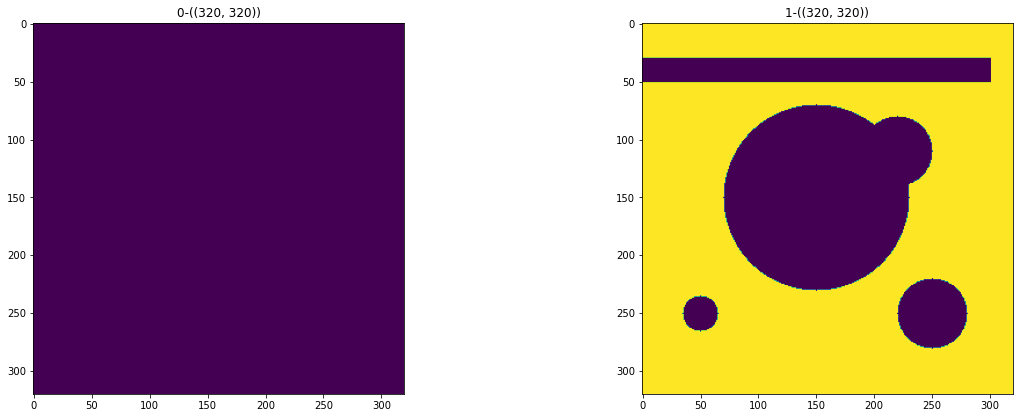

In [42]:
# 构造测试数据集
image_width=320
image_height=320
image_binary=np.ones((image_width,image_height))
circle_image=image_binary.copy()
circle_image=circle_image*100
cv2.circle(circle_image, (150, 150), 80,0, -1)
cv2.circle(circle_image, (220, 110), 30,0, -1)
cv2.circle(circle_image, (130, 130), 30,0, -1)
cv2.circle(circle_image, (130, 130), 15,0, -1)
cv2.circle(circle_image, (130, 130), 5,0, -1)
cv2.circle(circle_image, (180, 180), 20,0, -1)
cv2.circle(circle_image, (170, 170), 22,0, -1)
cv2.circle(circle_image, (250, 250), 30,0, -1)
cv2.circle(circle_image, (250, 250), 15,0, -1)
cv2.circle(circle_image, (50, 250), 15,0, -1)
cv2.rectangle(circle_image,(0,30),(300,50),0,-1)
show_images([image_binary,circle_image])

[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [-1  2 -1  0]]]
contours.shape/new_contour.shape (10, 1, 2) (8, 1, 2)
contours.shape/new_contour.shape (52, 1, 2) (12, 1, 2)
contours.shape/new_contour.shape (84, 1, 2) (16, 1, 2)
contours.shape/new_contour.shape (263, 1, 2) (39, 1, 2)


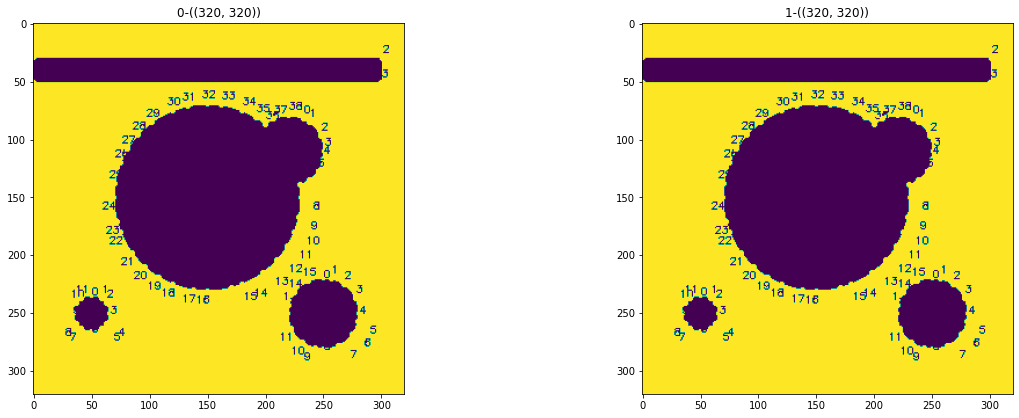

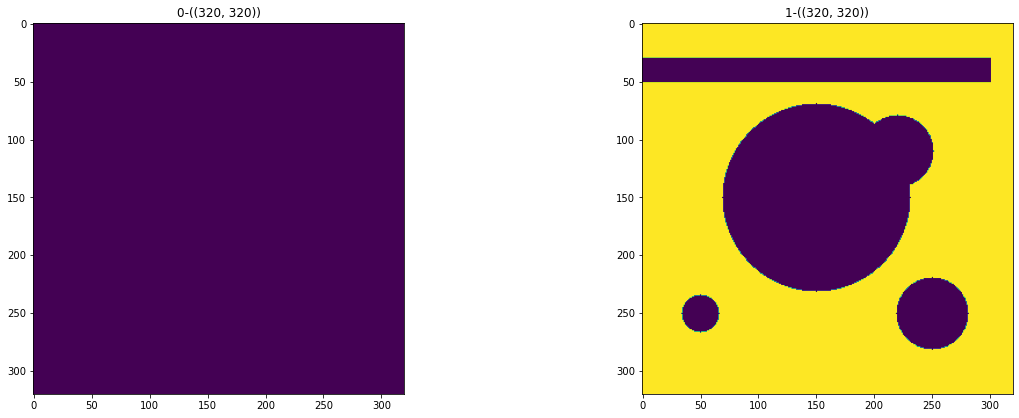

In [46]:
# 二值化
for label_value in [100]:
    test_image_binary=np.zeros_like(circle_image)
    test_image_binary=np.where(circle_image==label_value,255,test_image_binary)
    test_image_binary=test_image_binary.astype(np.uint8)
    contours,hierarchy =cv2.findContours(test_image_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(hierarchy)
#     print(contours[0])
    drawContours(test_image_binary,contours,maxdis=1)
    
    # 根据hierarchy及contours还原mask
    root_nodes=root_nodes_ind(hierarchy)
#     print(root_nodes)
    all_tree_nodes=build_all_tree(hierarchy,root_nodes)
#     print(all_tree_nodes)
    tree_to_mask(image_binary,contours,all_tree_nodes,isinner=True)